<a href="https://colab.research.google.com/github/rahulyad011/intrusion-detection/blob/main/SSL_Renegotiation_Kitsune_Network_Attack_model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model
import pickle # saving and loading trained model
from os import path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# importing library for support vector machine classifier
from sklearn.svm import SVC

# MLP requirements 
from keras.layers import Dense # importing dense layer
from keras.models import Sequential #importing Sequential layer
from keras.models import model_from_json # saving and loading trained model

# LSTM requirements 
from keras.layers import LSTM
from keras.layers import Input
from keras.models import Model

# evaluation metrices
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import det_curve

# representation of model layers
from keras.utils.vis_utils import plot_model

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
bin_data_total = data = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Datasets/kitsume_network_attack_dataset/SSL_Renegotiation_dataset_kitsune_binary_data_1M.csv")
bin_data_total.drop(bin_data_total.columns[0],axis=1,inplace=True)
bin_data_total

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X108,X109,X110,X111,X112,X113,X114,X115,Unnamed: 0,label
0,207.984758,758.226572,447496.232601,266.055290,754.491104,444150.700311,598.440977,748.736890,440526.641698,5251.742622,...,0.000000e+00,13715.152419,1450.000000,0.000171,1450.000000,2.933666e-08,0.000000e+00,0.000000e+00,170891,0.0
1,197.209612,758.045542,446542.028261,255.226027,753.885048,443085.283757,584.138940,747.404327,438855.070205,5173.514392,...,0.000000e+00,22704.087738,1450.000000,0.000103,1450.000000,1.071021e-08,0.000000e+00,0.000000e+00,1846583,0.0
2,164.028232,752.353902,444783.736704,235.678932,748.224424,442576.854099,558.677886,743.643349,439057.648497,1475.811935,...,0.000000e+00,771.145869,1450.000000,0.000022,1450.000000,4.656613e-10,0.000000e+00,0.000000e+00,6198,0.0
3,28.282915,61.777406,938.863567,45.442113,63.158650,1663.852208,131.510377,64.652811,2429.187237,576.839015,...,1.566165e-08,733.203812,60.000000,0.000004,1409.238350,4.008216e+04,-1.196681e-11,-1.675092e-08,11675,0.0
4,202.679878,741.376516,435540.144741,343.213591,743.329936,436006.036314,1034.792378,744.494456,435952.987784,10341.505114,...,0.000000e+00,23644.067768,150.346864,178.505412,150.346864,3.186418e+04,0.000000e+00,0.000000e+00,358397,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22071,42.333150,1425.002930,14654.248265,75.907653,1419.685022,22048.113094,251.417900,1412.775190,30722.554834,2583.663254,...,5.635901e-03,9345.612463,1406.803308,190.651625,1408.086280,3.634805e+04,-3.083220e+01,-3.967224e-02,2097523,1.0
22072,63.046327,1424.507960,21693.741026,99.309160,1415.277498,31086.702773,265.830219,1402.045127,44822.878533,2012.714825,...,1.940545e-02,4304.011010,1390.358807,244.966273,1391.664709,6.000849e+04,-4.395202e+01,-2.591355e-02,1460869,1.0
22073,53.527687,1390.435715,52526.539912,90.342996,1396.125179,48221.608148,270.955442,1398.141786,48552.721049,2204.489313,...,8.135443e-03,8954.424331,1388.283609,252.112930,1389.583878,6.356093e+04,1.612235e+01,1.532443e-02,1495676,1.0
22074,63.687001,1409.011212,41030.873921,100.927456,1405.694690,42200.649421,280.908235,1400.823004,45157.903720,2565.800226,...,8.165952e-03,8320.077481,1406.137193,192.682310,1407.421573,3.712648e+04,-4.256561e+01,-4.953509e-02,2089162,1.0


In [4]:
# distribution of label class before sampling
data_size = bin_data_total.shape[0]
# data_size
bin_data_total.label.value_counts()/data_size

0.0    0.958009
1.0    0.041991
Name: label, dtype: float64

In [5]:
model_name_suffix = "_kitsune_SSL_Renegotiation"

In [6]:
# numeric feature normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

numeric_cols = bin_data_total.select_dtypes(['number']).columns
numeric_cols = numeric_cols.drop('label')
flag = 0
scaler = None
if flag:
  # using standard scaler for normalizing
  scaler = StandardScaler()
else:
  # using minmax scaler for normalizing
  # to avoid negative values after scaling
  scaler = MinMaxScaler()

def normalization_train(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = scaler.fit_transform(arr.reshape(len(arr),1))
  return df

def normalization_test(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = scaler.transform(arr.reshape(len(arr),1))
  return df

# numeric_cols

In [7]:
# sampling data taking only 50% of the data
# bin_data = bin_data_total.groupby('label', group_keys=False).apply(lambda x: x.sample(frac=0.5))
bin_data = bin_data_total
bin_data

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X108,X109,X110,X111,X112,X113,X114,X115,Unnamed: 0,label
0,207.984758,758.226572,447496.232601,266.055290,754.491104,444150.700311,598.440977,748.736890,440526.641698,5251.742622,...,0.000000e+00,13715.152419,1450.000000,0.000171,1450.000000,2.933666e-08,0.000000e+00,0.000000e+00,170891,0.0
1,197.209612,758.045542,446542.028261,255.226027,753.885048,443085.283757,584.138940,747.404327,438855.070205,5173.514392,...,0.000000e+00,22704.087738,1450.000000,0.000103,1450.000000,1.071021e-08,0.000000e+00,0.000000e+00,1846583,0.0
2,164.028232,752.353902,444783.736704,235.678932,748.224424,442576.854099,558.677886,743.643349,439057.648497,1475.811935,...,0.000000e+00,771.145869,1450.000000,0.000022,1450.000000,4.656613e-10,0.000000e+00,0.000000e+00,6198,0.0
3,28.282915,61.777406,938.863567,45.442113,63.158650,1663.852208,131.510377,64.652811,2429.187237,576.839015,...,1.566165e-08,733.203812,60.000000,0.000004,1409.238350,4.008216e+04,-1.196681e-11,-1.675092e-08,11675,0.0
4,202.679878,741.376516,435540.144741,343.213591,743.329936,436006.036314,1034.792378,744.494456,435952.987784,10341.505114,...,0.000000e+00,23644.067768,150.346864,178.505412,150.346864,3.186418e+04,0.000000e+00,0.000000e+00,358397,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22071,42.333150,1425.002930,14654.248265,75.907653,1419.685022,22048.113094,251.417900,1412.775190,30722.554834,2583.663254,...,5.635901e-03,9345.612463,1406.803308,190.651625,1408.086280,3.634805e+04,-3.083220e+01,-3.967224e-02,2097523,1.0
22072,63.046327,1424.507960,21693.741026,99.309160,1415.277498,31086.702773,265.830219,1402.045127,44822.878533,2012.714825,...,1.940545e-02,4304.011010,1390.358807,244.966273,1391.664709,6.000849e+04,-4.395202e+01,-2.591355e-02,1460869,1.0
22073,53.527687,1390.435715,52526.539912,90.342996,1396.125179,48221.608148,270.955442,1398.141786,48552.721049,2204.489313,...,8.135443e-03,8954.424331,1388.283609,252.112930,1389.583878,6.356093e+04,1.612235e+01,1.532443e-02,1495676,1.0
22074,63.687001,1409.011212,41030.873921,100.927456,1405.694690,42200.649421,280.908235,1400.823004,45157.903720,2565.800226,...,8.165952e-03,8320.077481,1406.137193,192.682310,1407.421573,3.712648e+04,-4.256561e+01,-4.953509e-02,2089162,1.0


In [8]:
number_of_cols = bin_data.shape[1]

In [9]:
# distribution of label class after sampling
data_size = bin_data.shape[0]
bin_data.label.value_counts()/data_size

0.0    0.958009
1.0    0.041991
Name: label, dtype: float64

In [10]:
model_selection = {
    0 : "ALL",
    2 : "MLP",
    3 : "LSTM",
    4 : "AE"
}
model_flag = 0
svm_enable = 1

In [11]:
X = bin_data.iloc[:,0:number_of_cols] # dataset excluding target attribute (encoded, one-hot-encoded,original)
Y = bin_data['label'] # target attribute

In [12]:
# splitting the dataset 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=42) 

In [13]:
# calling the normalization() function
X_train = normalization_train(X_train,numeric_cols)
X_train.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X108,X109,X110,X111,X112,X113,X114,X115,Unnamed: 0,label
17629,0.352632,0.501315,0.958633,0.398031,0.500041,0.961815,0.459124,0.501106,0.973889,0.476535,...,0.627001,0.505823,1.000000,1.735379e-07,1.000000,3.010926e-14,0.74044,0.586849,0.949747,0.0
5438,0.201716,0.476563,0.923905,0.273683,0.480927,0.938720,0.406626,0.490910,0.963619,0.487705,...,0.627001,0.613280,0.068957,3.374810e-01,0.068957,1.138702e-01,0.74044,0.586849,0.885262,0.0
12243,0.627557,0.502580,0.985239,0.557351,0.500468,0.982867,0.508747,0.500805,0.983861,0.486373,...,0.627001,0.496206,1.000000,2.603069e-07,1.000000,6.774583e-14,0.74044,0.586849,0.579881,0.0
7302,0.206028,0.969986,0.094588,0.223160,0.966059,0.104860,0.247036,0.971616,0.105217,0.244196,...,0.627001,0.539162,0.971816,3.062648e-01,0.972734,9.377896e-02,0.74044,0.586849,0.291479,0.0
8164,0.225206,0.469779,0.939566,0.278596,0.477029,0.944382,0.396487,0.490812,0.963318,0.485260,...,0.627001,0.515990,1.000000,1.325418e-07,1.000000,1.756373e-14,0.74044,0.586849,0.901067,0.0


In [14]:
# calling the normalization() function
X_test = normalization_test(X_test,numeric_cols)
X_test.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X108,X109,X110,X111,X112,X113,X114,X115,Unnamed: 0,label
17547,-0.000024,0.000260,0.199182,0.000008,0.000259,0.198542,0.000164,0.000258,0.197736,0.002265,...,-0.000079,0.012345,-0.000006,0.000018,-0.000006,0.020748,-0.000079,-0.000079,0.884198,0.0
12396,-0.000038,0.000255,0.197576,-0.000009,0.000257,0.198209,0.000144,0.000259,0.199138,0.002093,...,-0.000079,0.011702,-0.000006,0.000022,-0.000006,0.022147,-0.000079,-0.000079,0.996888,0.0
3142,-0.000043,0.000246,0.196062,-0.000014,0.000250,0.197022,0.000140,0.000254,0.198288,0.002228,...,-0.000079,0.012116,-0.000011,0.000007,-0.000011,0.016241,-0.000079,-0.000079,0.639226,0.0
4528,-0.000064,-0.000052,-0.000079,-0.000057,-0.000052,-0.000079,-0.000019,-0.000052,-0.000079,0.000367,...,-0.000079,0.000678,-0.000051,-0.000075,0.000558,0.018388,-0.000180,-0.000079,0.864086,0.0
17451,0.000042,0.000259,0.200296,0.000100,0.000259,0.199216,0.000407,0.000258,0.197874,0.004258,...,-0.000079,0.004733,0.000578,-0.000079,0.000578,-0.000079,-0.000079,-0.000079,0.022501,0.0


## **Linear Support Vector Machine Classifier (Binary Classification) **
to enable make the svm_enable = 1 in the above cell

In [15]:
if svm_enable:
  # using kernel as linear 
  lsvm = SVC(kernel='linear',gamma='auto') 
  lsvm.fit(X_train,y_train) # training model on training dataset

In [16]:
if svm_enable:
  pkl_filename = "/content/drive/MyDrive/Colab_Notebooks/Models/lsvm_binary"+model_name_suffix+".pkl"
  if (not path.isfile(pkl_filename)):
    # saving the trained model to disk
    with open(pkl_filename, 'wb') as file:
      pickle.dump(lsvm, file)
    print("Saved model to disk")
    # loading the trained model from disk
    with open(pkl_filename, 'rb') as file:
      lsvm = pickle.load(file)
    print("Loaded model from disk") 

Saved model to disk
Loaded model from disk


In [17]:
if svm_enable:
  y_pred = lsvm.predict(X_test) # predicting target attribute on testing dataset
  ac = accuracy_score(y_test, y_pred)*100 # calculating accuracy of predicted data
  print("LSVM-Classifier Binary Set-Accuracy is ", ac)

LSVM-Classifier Binary Set-Accuracy is  64.81246602645406


In [18]:
# import matplotlib.pyplot as plt
# from sklearn.datasets import make_classification
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# from sklearn.model_selection import train_test_split
# from sklearn.svm import SVC
# X, y = make_classification(random_state=0)
# X_train, X_test, y_train, y_test = train_test_split(X, y,
#                                                     random_state=0)
# cm = confusion_matrix(y_test, y_pred, labels=lsvm.classes_)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,
#                               display_labels=lsvm.classes_)
# disp.plot()

# plt.show()

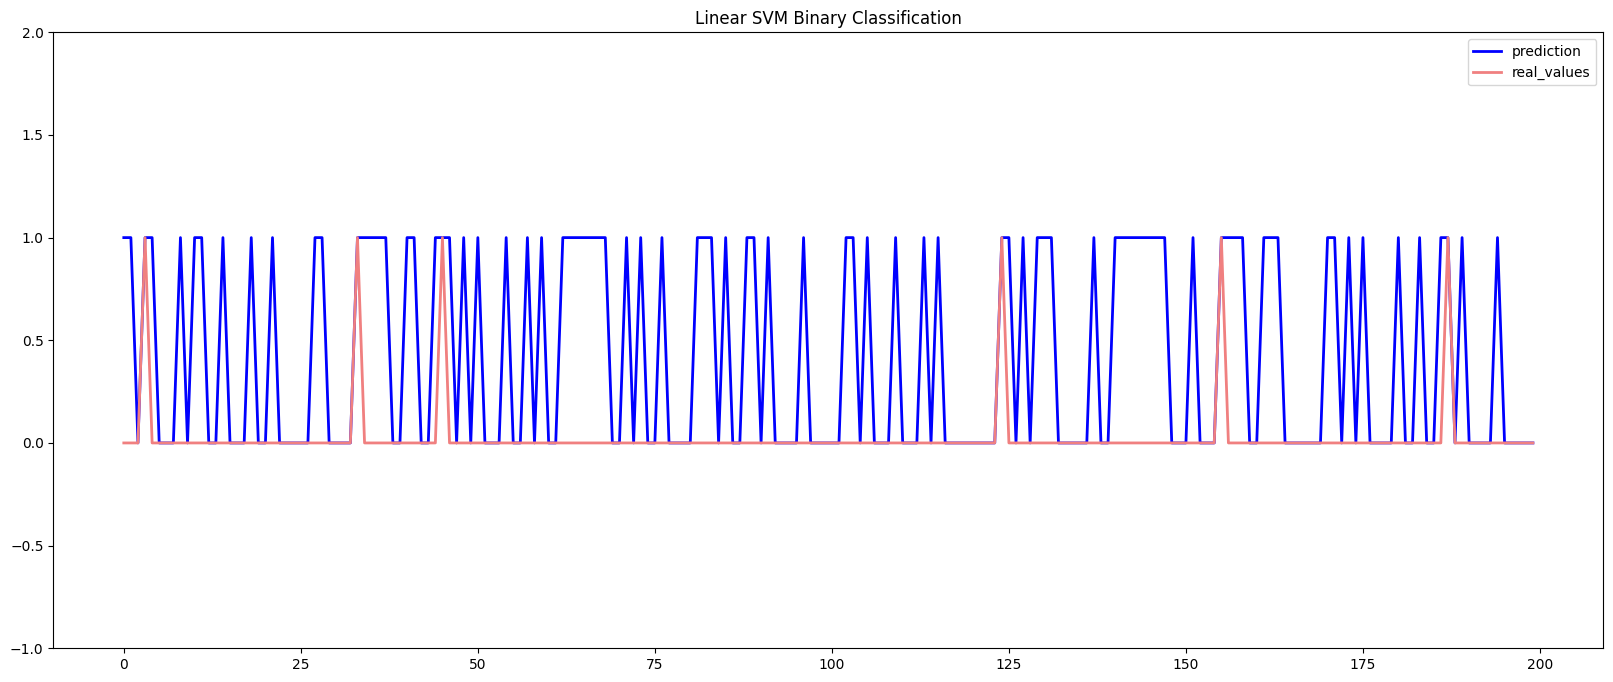

In [19]:
if svm_enable:
  plt.figure(figsize=(20,8))
  plt.plot(y_pred[300:500], label="prediction", linewidth=2.0,color='blue')
  plt.plot(y_test[300:500].values, label="real_values", linewidth=2.0,color='lightcoral')
  plt.legend(loc="best")
  plt.ylim((-1,2))
  plt.title("Linear SVM Binary Classification")
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/lsvm_real_pred_bin.png')
  plt.show()

In [20]:
if svm_enable:
  target_names = ['class 0', 'class 1']
  print(classification_report(y_test, y_pred, target_names=target_names))
  fpr, fnr, thresholds = det_curve(y_test, y_pred)
  print("False Positive Rate - ", fpr)
  print("False Negative Rate - ", fnr)
  print("Thresholds - ", thresholds)

              precision    recall  f1-score   support

     class 0       1.00      0.63      0.78      5305
     class 1       0.10      1.00      0.18       214

    accuracy                           0.65      5519
   macro avg       0.55      0.82      0.48      5519
weighted avg       0.97      0.65      0.75      5519

False Positive Rate -  [0.36606975]
False Negative Rate -  [0.]
Thresholds -  [1.]


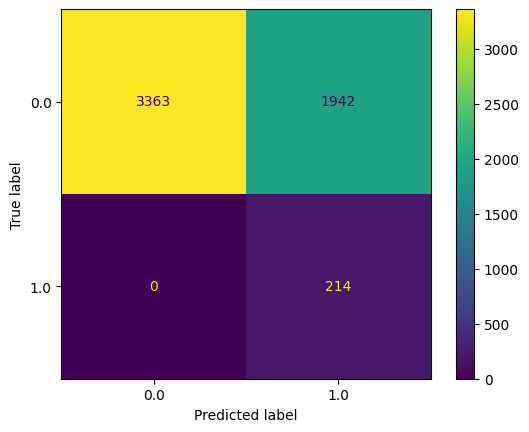

In [21]:
if svm_enable:
  from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

  clf = lsvm
  cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=clf.classes_)
  disp.plot()

  plt.show()

## **Multi Layer Perceptron Classifier (Binary Classification)**

In [22]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  mlp = Sequential() # creating model

  # adding input layer and first layer with 50 neurons
  mlp.add(Dense(units=50, input_dim=X_train.shape[1], activation='relu'))
  # output layer with sigmoid activation
  mlp.add(Dense(units=1,activation='sigmoid'))

In [23]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # defining loss function, optimizer, metrics and then compiling model
  mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # summary of model layers
  mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                5900      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 5,951
Trainable params: 5,951
Non-trainable params: 0
_________________________________________________________________


In [25]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # training the model on training dataset
  history = mlp.fit(X_train, y_train, epochs=100, batch_size=5000,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 6s 103ms/step - loss: 0.6035 - accuracy: 0.7784 - val_loss: 0.4464 - val_accuracy: 0.8961
Epoch 2/100
3/3 [==============================] - 0s 20ms/step - loss: 0.3963 - accuracy: 0.9030 - val_loss: 0.3047 - val_accuracy: 0.9502
Epoch 3/100
3/3 [==============================] - 0s 18ms/step - loss: 0.2724 - accuracy: 0.9573 - val_loss: 0.2304 - val_accuracy: 0.9523
Epoch 4/100
3/3 [==============================] - 0s 18ms/step - loss: 0.2101 - accuracy: 0.9581 - val_loss: 0.1994 - val_accuracy: 0.9523
Epoch 5/100
3/3 [==============================] - 0s 18ms/step - loss: 0.1835 - accuracy: 0.9581 - val_loss: 0.1880 - val_accuracy: 0.9523
Epoch 6/100
3/3 [==============================] - 0s 19ms/step - loss: 0.1727 - accuracy: 0.9581 - val_loss: 0.1840 - val_accuracy: 0.9523
Epoch 7/100
3/3 [==============================] - 0s 18ms/step - loss: 0.1683 - accuracy: 0.9581 - val_loss: 0.1816 - val_accuracy: 0.9523
Epoch 8/100
3/3 [==

In [26]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  filepath = '/content/drive/MyDrive/Colab_Notebooks/Models/mlp_binary'+model_name_suffix+'.json'
  weightspath = '/content/drive/MyDrive/Colab_Notebooks/Weights/mlp_binary'+model_name_suffix+'.h5'
  if (not path.isfile(filepath)):
    # serialize model to JSON
    mlp_json = mlp.to_json()
    with open(filepath, "w") as json_file:
      json_file.write(mlp_json)

    # serialize weights to HDF5
    mlp.save_weights(weightspath)
    print("Saved model to disk")

    # load json and create model
    json_file = open(filepath, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    mlp = model_from_json(loaded_model_json)

    # load weights into new model
    mlp.load_weights(weightspath)
    print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [27]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # defining loss function, optimizer, metrics and then compiling model
  mlp.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # predicting target attribute on testing dataset
  test_results = mlp.evaluate(X_test, y_test, verbose=1)
  print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}')

173/173 [==============================] - 1s 2ms/step - loss: 1441425.8750 - accuracy: 0.9627
Test results - Loss: 1441425.875 - Accuracy: 96.26743793487549


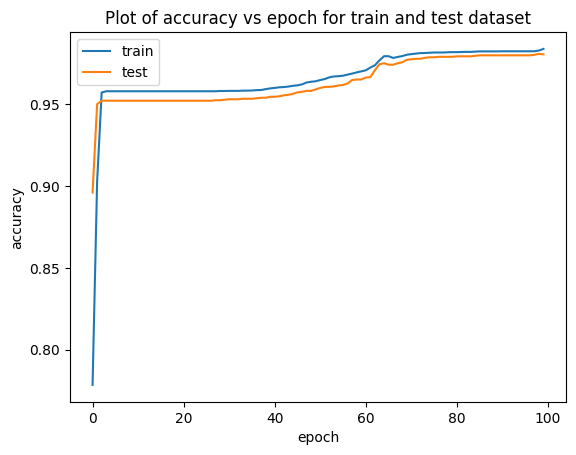

In [29]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":  
  # Plot of accuracy vs epoch of train and test dataset
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title("Plot of accuracy vs epoch for train and test dataset")
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/mlp_binary_accuracy.png')
  plt.show()

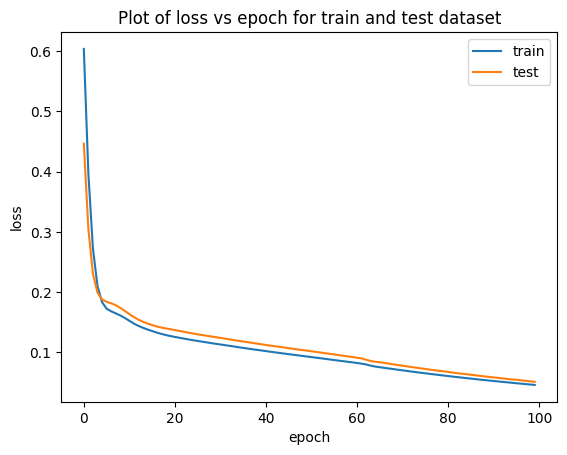

In [30]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # Plot of loss vs epoch of train and test dataset
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Plot of loss vs epoch for train and test dataset')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/mlp_binary_loss.png')
  plt.show()

In [31]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  # representation of model layers
  from keras.utils.vis_utils import plot_model
  plot_model(mlp, to_file='/content/drive/MyDrive/Colab_Notebooks/Plots/mlp_binary.png', show_shapes=True,)

In [32]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  y_pred = mlp.predict(X_test).ravel()
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  auc = auc(fpr, tpr)

173/173 [==============================] - 0s 2ms/step


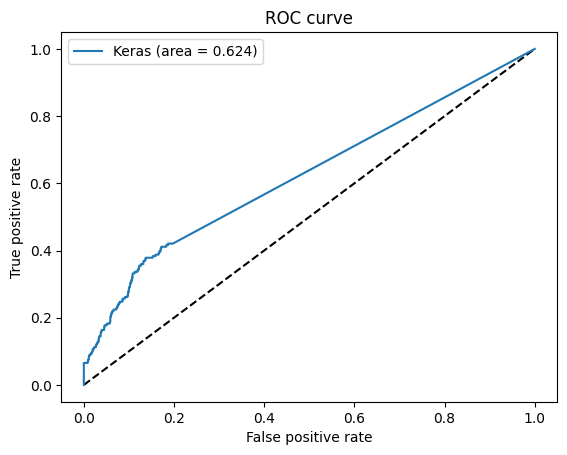

In [33]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc))
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate')
  plt.title('ROC curve')
  plt.legend(loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/mlp_binary_roc.png')
  plt.show()

In [34]:
# real_data_kdd = bin_data.copy()

# # Names of the columns that are discrete
# cat_cols = real_data_kdd.select_dtypes(['object']).columns
# # cat_cols
# test_data = real_data_kdd.iloc[:999]

# corr= test_data.corr()
# corr_y = abs(corr['label'])
# highest_corr = corr_y
# highest_corr.sort_values(ascending=True)

In [35]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  y_classes = (mlp.predict(X_test)>0.5).astype('int32')

173/173 [==============================] - 0s 1ms/step


In [36]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "MLP":
  print("Recall Score - ",recall_score(y_test,y_classes))
  print("F1 Score - ",f1_score(y_test,y_classes))
  print("Precision Score - ",precision_score(y_test,y_classes))
  fpr, fnr, thresholds = det_curve(y_test, y_classes)
  print("False Positive Rate - ", fpr)
  print("False Negative Rate - ", fnr)
  print("Thresholds - ", thresholds)

Recall Score -  0.037383177570093455
F1 Score -  0.07207207207207207
Precision Score -  1.0
False Positive Rate -  [1. 0.]
False Negative Rate -  [0.         0.96261682]
Thresholds -  [0 1]


              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5305
           1       1.00      0.04      0.07       214

    accuracy                           0.96      5519
   macro avg       0.98      0.52      0.53      5519
weighted avg       0.96      0.96      0.95      5519



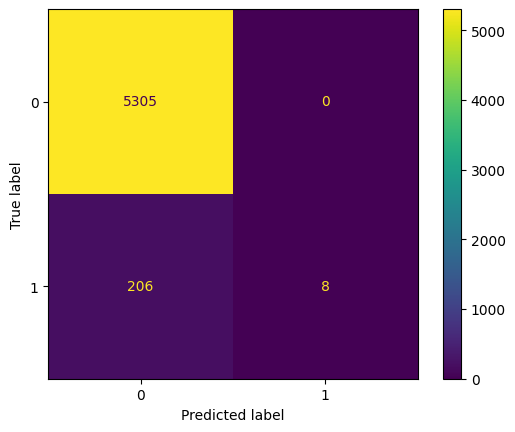

In [37]:
print(classification_report(y_test, y_classes, target_names=['0', '1']))
cm = confusion_matrix(y_test, y_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['0', '1'])
disp.plot()

plt.show()

# **Correlation** Matrix of Features

In [38]:
corr= bin_data.corr()
corr_y = abs(corr['label'])
highest_corr = corr_y[corr_y >0.3]
highest_corr.sort_values(ascending=True)

X64      0.322045
X65      0.416554
label    1.000000
Name: label, dtype: float64

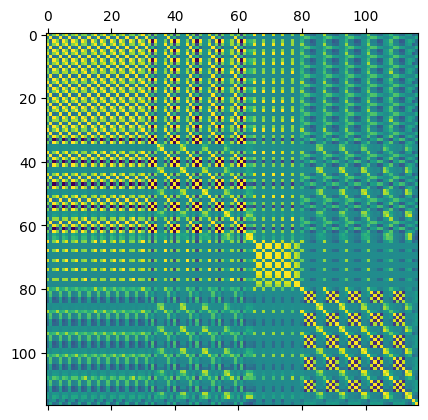

In [39]:
plt.matshow(corr)
plt.show()

## **LSTM Classifier**

In [40]:
X_train = np.array(X_train)
X_test = np.array(X_test)
# y_train.shape   #(18896,)
X_train.shape

(16557, 117)

In [41]:
y_train = np.array(y_train)
type(y_train)

numpy.ndarray

In [42]:
x_train = np.reshape(X_train, (X_train.shape[0],1,X_train.shape[1]))
x_train.shape

(16557, 1, 117)

In [43]:
x_train.shape[2]

117

In [44]:
x_test = np.reshape(X_test, (X_test.shape[0],1,X_test.shape[1]))
x_test.shape

(5519, 1, 117)

In [45]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  lst = Sequential()
  # input layer and LSTM layer with 50 neurons
  input_features = x_train.shape[2]
  lst.add(LSTM(50,input_dim=input_features))

  # outpute layer with sigmoid activation
  lst.add(Dense(1,activation='sigmoid'))

In [46]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # defining loss function, optimizer, metrics and then compiling model
  lst.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [47]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # summary of model layers
  lst.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                33600     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 33,651
Trainable params: 33,651
Non-trainable params: 0
_________________________________________________________________


In [48]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # training the model on training dataset
  history = lst.fit(x_train, y_train, epochs=100, batch_size=5000,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 3s 223ms/step - loss: 0.6084 - accuracy: 0.9574 - val_loss: 0.4937 - val_accuracy: 0.9523
Epoch 2/100
3/3 [==============================] - 0s 19ms/step - loss: 0.4529 - accuracy: 0.9581 - val_loss: 0.3725 - val_accuracy: 0.9523
Epoch 3/100
3/3 [==============================] - 0s 20ms/step - loss: 0.3416 - accuracy: 0.9581 - val_loss: 0.2914 - val_accuracy: 0.9523
Epoch 4/100
3/3 [==============================] - 0s 20ms/step - loss: 0.2680 - accuracy: 0.9581 - val_loss: 0.2406 - val_accuracy: 0.9523
Epoch 5/100
3/3 [==============================] - 0s 27ms/step - loss: 0.2225 - accuracy: 0.9581 - val_loss: 0.2107 - val_accuracy: 0.9523
Epoch 6/100
3/3 [==============================] - 0s 19ms/step - loss: 0.1951 - accuracy: 0.9581 - val_loss: 0.1942 - val_accuracy: 0.9523
Epoch 7/100
3/3 [==============================] - 0s 24ms/step - loss: 0.1797 - accuracy: 0.9581 - val_loss: 0.1857 - val_accuracy: 0.9523
Epoch 8/100
3/3 [==

In [49]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  filepath = '/content/drive/MyDrive/Colab_Notebooks/Models/lst_binary_kitsune'+model_name_suffix+'.json'
  weightspath = '/content/drive/MyDrive/Colab_Notebooks/Weights/lst_binary_kitsune'+model_name_suffix+'.h5'
  if (not path.isfile(filepath)):
    # serialize model to JSON
    lst_json = lst.to_json()
    with open(filepath, "w") as json_file:
      json_file.write(lst_json)

    # serialize weights to HDF5
    lst.save_weights(weightspath)
    print("Saved model to disk")

    # load json and create model
    json_file = open(filepath, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    lst = model_from_json(loaded_model_json)

    # load weights into new model
    lst.load_weights(weightspath)
    print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [50]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # load json and create model
  json_file = open(filepath, 'r')
  loaded_model_json = json_file.read()
  json_file.close()
  lst = model_from_json(loaded_model_json)

  # load weights into new model
  lst.load_weights(weightspath)
  print("Loaded model from disk")

Loaded model from disk


In [51]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # defining loss function, optimizer, metrics and then compiling model
  lst.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [52]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # predicting target attribute on testing dataset
  test_results = lst.evaluate(x_test, y_test, verbose=1)
  print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

173/173 [==============================] - 1s 2ms/step - loss: 0.1792 - accuracy: 0.9627
Test results - Loss: 0.17918606102466583 - Accuracy: 96.26743793487549%


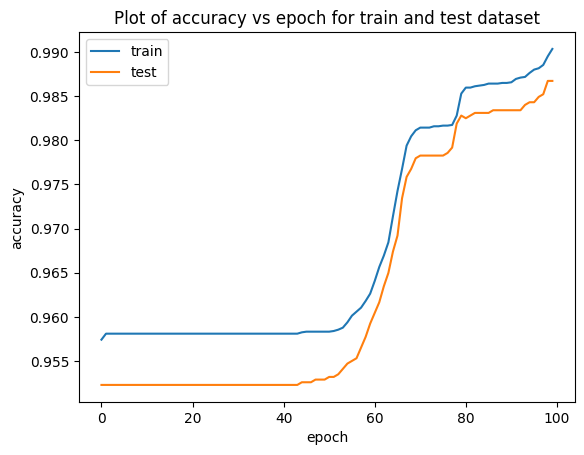

In [53]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # Plot of accuracy vs epoch of train and test dataset
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title("Plot of accuracy vs epoch for train and test dataset")
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/lstm_binary_accuracy.png')
  plt.show()

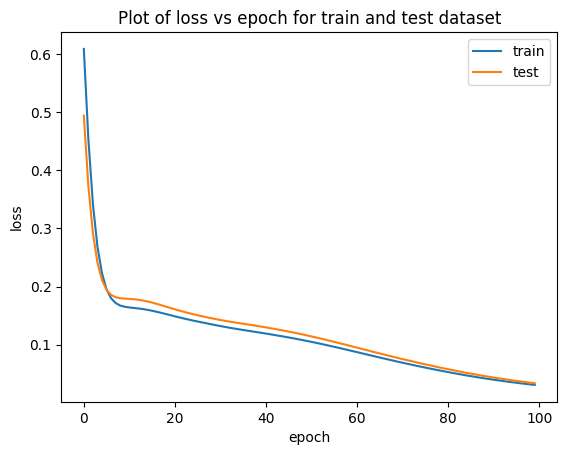

In [54]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # Plot of loss vs epoch of train and test dataset
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title("Plot of loss vs epoch for train and test dataset")
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/lstm_binary_loss.png')
  plt.show()

In [55]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  # representation of model layers
  plot_model(lst, to_file='/content/drive/MyDrive/Colab_Notebooks/Plots/lstm_binary.png', show_shapes=True,)

In [56]:
y_test = np.array(y_test)
y_test.shape

(5519,)

In [57]:
type(y_test)

numpy.ndarray

In [58]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  y_classes = (lst.predict(x_test)>0.5).astype('int32')

173/173 [==============================] - 1s 2ms/step


In [59]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "LSTM":
  print("Recall Score - ",recall_score(y_test,y_classes))
  print("F1 Score - ",f1_score(y_test,y_classes))
  print("Precision Score - ",precision_score(y_test,y_classes))
  fpr, fnr, thresholds = det_curve(y_test, y_classes)
  print("False Positive Rate - ", fpr)
  print("False Negative Rate - ", fnr)
  print("Thresholds - ", thresholds)

Recall Score -  0.037383177570093455
F1 Score -  0.07207207207207207
Precision Score -  1.0
False Positive Rate -  [1. 0.]
False Negative Rate -  [0.         0.96261682]
Thresholds -  [0 1]


              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5305
           1       1.00      0.04      0.07       214

    accuracy                           0.96      5519
   macro avg       0.98      0.52      0.53      5519
weighted avg       0.96      0.96      0.95      5519



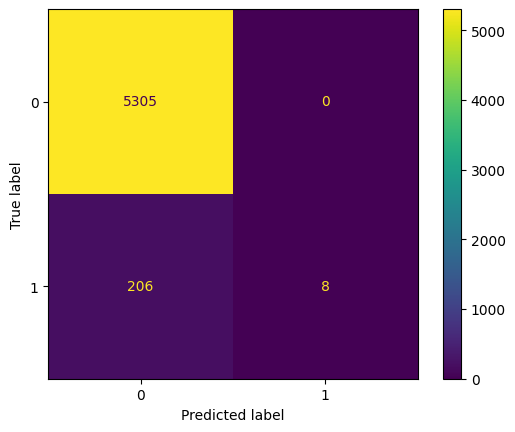

In [60]:
print(classification_report(y_test, y_classes, target_names=['0', '1']))
cm = confusion_matrix(y_test, y_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['0', '1'])
disp.plot()

plt.show()

## **Auto Encoder**

In [61]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # splitting the dataset 75% for training and 25% testing
  X_train, X_test = train_test_split(bin_data, test_size=0.25, random_state=42)

In [62]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # dataset excluding target attribute (encoded, one-hot-encoded,original)
  X_train = X_train.drop(['label'],axis=1) 

  y_test = X_test['label'] # target attribute

  # dataset excluding target attribute (encoded, one-hot-encoded,original)
  X_test = X_test.drop(['label'],axis=1)
  # calling the normalization() function
  X_train = normalization_train(X_train,numeric_cols)
  X_test = normalization_test(X_test,numeric_cols)
  X_train = X_train.values
  X_test = X_test.values
  y_test = y_test.values

In [63]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  input_dim = X_train.shape[1]
  encoding_dim = 50

  #input layer
  input_layer = Input(shape=(input_dim, ))
  #encoding layer with 50 neurons
  encoder = Dense(encoding_dim, activation="relu")(input_layer)           
  #decoding and output layer
  output_layer = Dense(input_dim, activation='softmax')(encoder)

In [64]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # creating model with input, encoding, decoding, output layers
  autoencoder = Model(inputs=input_layer, outputs=output_layer)

  # defining loss function, optimizer, metrics and then compiling model
  autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [65]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # summary of model layers
  autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 116)]             0         
                                                                 
 dense_3 (Dense)             (None, 50)                5850      
                                                                 
 dense_4 (Dense)             (None, 116)               5916      
                                                                 
Total params: 11,766
Trainable params: 11,766
Non-trainable params: 0
_________________________________________________________________


In [66]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # training the model on training dataset
  history = autoencoder.fit(X_train, X_train, epochs=100,batch_size=500,validation_data=(X_test, X_test)).history

Epoch 1/100
34/34 [==============================] - 1s 8ms/step - loss: 0.3766 - accuracy: 0.0030 - val_loss: 2184577535705088.0000 - val_accuracy: 0.0000e+00
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 0.3733 - accuracy: 0.0985 - val_loss: 2184577535705088.0000 - val_accuracy: 0.0000e+00
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 0.3721 - accuracy: 0.0505 - val_loss: 2184577535705088.0000 - val_accuracy: 0.0000e+00
Epoch 4/100
34/34 [==============================] - 0s 5ms/step - loss: 0.3717 - accuracy: 0.0178 - val_loss: 2184577535705088.0000 - val_accuracy: 0.0000e+00
Epoch 5/100
34/34 [==============================] - 0s 5ms/step - loss: 0.3716 - accuracy: 0.0240 - val_loss: 2184577535705088.0000 - val_accuracy: 0.0000e+00
Epoch 6/100
34/34 [==============================] - 0s 8ms/step - loss: 0.3716 - accuracy: 0.0433 - val_loss: 2184577535705088.0000 - val_accuracy: 0.0000e+00
Epoch 7/100
34/34 [=====================

In [67]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  filepath = '/content/drive/MyDrive/Colab_Notebooks/Models/ae_binary'+model_name_suffix+'.json'
  weightspath = '/content/drive/MyDrive/Colab_Notebooks/Weights/ae_binary'+model_name_suffix+'.h5'
  if (not path.isfile(filepath)): 
    # serialize model to JSON
    autoencoder_json = autoencoder.to_json()
    with open(filepath, "w") as json_file:
      json_file.write(autoencoder_json)

    # serialize weights to HDF5
    autoencoder.save_weights(weightspath)
    print("Saved model to disk")

    # load json and create model
    json_file = open(filepath, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    autoencoder = model_from_json(loaded_model_json)

    # load weights into new model
    autoencoder.load_weights(weightspath)
    print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [68]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # defining loss function, optimizer, metrics and then compiling model
  autoencoder.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [69]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # predicting target attribute on testing dataset
  test_results = autoencoder.evaluate(X_test, X_test, verbose=1)
  print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]}%')

173/173 [==============================] - 1s 3ms/step - loss: 2184577804140544.0000 - accuracy: 0.0000e+00
Test results - Loss: 2184577804140544.0 - Accuracy: 0.0%


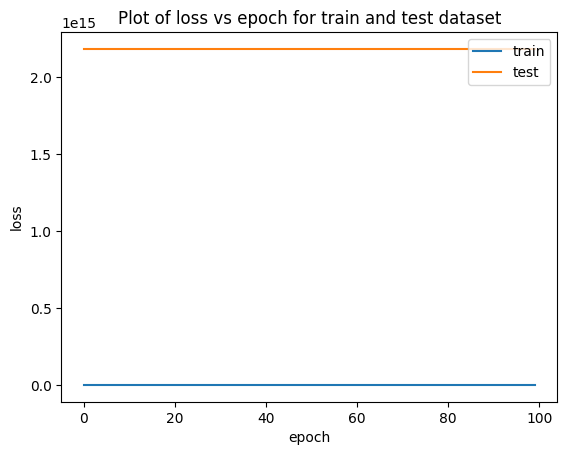

In [70]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # Plot of loss vs epoch of train and test dataset
  plt.plot(history['loss'])
  plt.plot(history['val_loss'])
  plt.title("Plot of loss vs epoch for train and test dataset")
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper right')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/ae_binary_loss.png')
  plt.show()

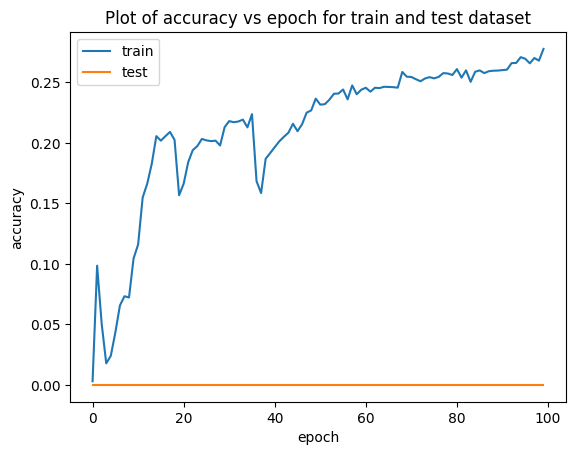

In [71]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # Plot of accuracy vs epoch of train and test dataset
  plt.plot(history['accuracy'])
  plt.plot(history['val_accuracy'])
  plt.title("Plot of accuracy vs epoch for train and test dataset")
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/ae_binary_accuracy.png')
  plt.show()

In [72]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # representation of model layers
  plot_model(autoencoder, to_file='/content/drive/MyDrive/Colab_Notebooks/Plots/ae_binary.png', show_shapes=True,)

In [73]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # calculating reconstruction error 
  predictions = autoencoder.predict(X_test)

173/173 [==============================] - 0s 1ms/step


In [74]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  mse = np.mean(np.power(X_test - predictions, 2), axis=1)
  error_df = pd.DataFrame({'reconstruction_error': mse,
                           'true_class': y_test})

In [75]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  error_df.describe()
  print(predictions.shape)

(5519, 116)


## **AE Classifier**

In [76]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  i_dim = predictions.shape[1]

  #input layer
  i_layer = Input(shape=(i_dim, ))
  #hidden layer with 50 neurons
  fvector = Dense(50, activation="sigmoid")(i_layer)                    
  #doutput layer
  o_layer = Dense(1, activation='sigmoid')(fvector)

In [77]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # creating model with input, encoding, decoding, output layers
  ae_classifier = Model(inputs=i_layer, outputs=o_layer)

  # defining loss function, optimizer, metrics and then compiling model
  ae_classifier.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [78]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # summary of model layers
  ae_classifier.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 116)]             0         
                                                                 
 dense_5 (Dense)             (None, 50)                5850      
                                                                 
 dense_6 (Dense)             (None, 1)                 51        
                                                                 
Total params: 5,901
Trainable params: 5,901
Non-trainable params: 0
_________________________________________________________________


In [79]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # training the model on training dataset
  his = ae_classifier.fit(predictions, y_test, epochs=300,batch_size=500, validation_split=0.2).history

Epoch 1/300
9/9 [==============================] - 1s 23ms/step - loss: 1.0115 - accuracy: 0.0374 - val_loss: 0.9176 - val_accuracy: 0.0444
Epoch 2/300
9/9 [==============================] - 0s 7ms/step - loss: 0.8570 - accuracy: 0.0374 - val_loss: 0.7762 - val_accuracy: 0.0444
Epoch 3/300
9/9 [==============================] - 0s 6ms/step - loss: 0.7232 - accuracy: 0.2247 - val_loss: 0.6570 - val_accuracy: 0.9556
Epoch 4/300
9/9 [==============================] - 0s 6ms/step - loss: 0.6115 - accuracy: 0.9626 - val_loss: 0.5593 - val_accuracy: 0.9556
Epoch 5/300
9/9 [==============================] - 0s 9ms/step - loss: 0.5207 - accuracy: 0.9626 - val_loss: 0.4811 - val_accuracy: 0.9556
Epoch 6/300
9/9 [==============================] - 0s 8ms/step - loss: 0.4484 - accuracy: 0.9626 - val_loss: 0.4194 - val_accuracy: 0.9556
Epoch 7/300
9/9 [==============================] - 0s 6ms/step - loss: 0.3918 - accuracy: 0.9626 - val_loss: 0.3710 - val_accuracy: 0.9556
Epoch 8/300
9/9 [=========

In [80]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  filepath = '/content/drive/MyDrive/Colab_Notebooks/Models/ae_classifier_binary'+model_name_suffix+'.json'
  weightspath = '/content/drive/MyDrive/Colab_Notebooks/Weights/ae_classifier_binary'+model_name_suffix+'.h5'
  if (not path.isfile(filepath)): 
    # serialize model to JSON
    ae_classifier_json = ae_classifier.to_json()
    with open(filepath, "w") as json_file:
      json_file.write(ae_classifier_json)

    # serialize weights to HDF5
    ae_classifier.save_weights(weightspath)
    print("Saved model to disk")

    # load json and create model
    json_file = open(filepath, 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    ae_classifier = model_from_json(loaded_model_json)

    # load weights into new model
    ae_classifier.load_weights(weightspath)
    print("Loaded model from disk")

Saved model to disk
Loaded model from disk


In [81]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  ae_classifier.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [82]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # predicting target attribute on testing dataset
  test_results = ae_classifier.evaluate(X_test, y_test, verbose=1)
  print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

173/173 [==============================] - 1s 2ms/step - loss: 1.5087 - accuracy: 0.0752
Test results - Loss: 1.5087100267410278 - Accuracy: 7.519478350877762%


In [83]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # representation of model layers
  plot_model(ae_classifier, to_file='/content/drive/MyDrive/Colab_Notebooks/Plots/ae_classifier_binary.png', show_shapes=True)

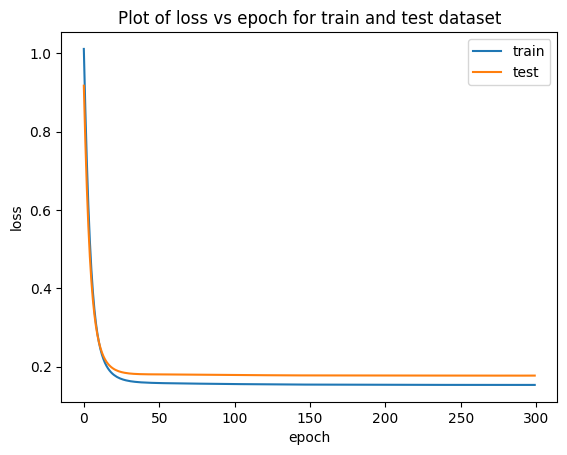

In [84]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # Plot of loss vs epoch of train and test dataset
  plt.plot(his['loss'])
  plt.plot(his['val_loss'])
  plt.title("Plot of loss vs epoch for train and test dataset")
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper right')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/ae_classifier_binary_loss.png')
  plt.show()

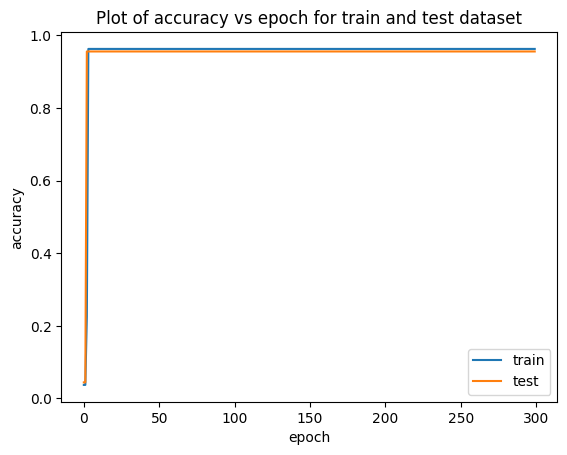

In [85]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  # Plot of accuracy vs epoch of train and test dataset
  plt.plot(his['accuracy'])
  plt.plot(his['val_accuracy'])
  plt.title("Plot of accuracy vs epoch for train and test dataset")
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/ae_classifier_binary_accuracy.png')
  plt.show()

In [86]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  y_pred = ae_classifier.predict(X_test).ravel()
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  #auc = auc(fpr, tpr)

173/173 [==============================] - 0s 1ms/step


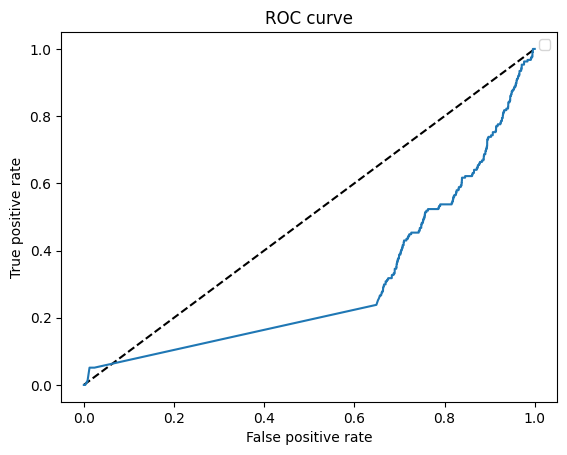

In [87]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  plt.plot([0, 1], [0, 1], 'k--')
  #plt.plot(fpr, tpr, label='Keras (area = {:.3f})'.format(auc))
  plt.plot(fpr, tpr)
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate')
  plt.title('ROC curve')
  plt.legend(loc='best')
  plt.savefig('/content/drive/MyDrive/Colab_Notebooks/Plots/ae_binary_roc.png')
  plt.show()

In [88]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  pred = ae_classifier.predict(X_test)
  y_classes = (ae_classifier.predict(X_test)>0.5).astype('int32')

173/173 [==============================] - 0s 1ms/step


In [89]:
if model_selection[model_flag]=="ALL" or model_selection[model_flag] == "AE":
  print("Recall Score - ",recall_score(y_test,y_classes))
  print("F1 Score - ",f1_score(y_test,y_classes))
  print("Precision Score - ",precision_score(y_test,y_classes))
  fpr, fnr, thresholds = det_curve(y_test, y_classes)
  print("False Positive Rate - ", fpr)
  print("False Negative Rate - ", fnr)
  print("Thresholds - ", thresholds)

Recall Score -  0.897196261682243
F1 Score -  0.06997084548104955
Precision Score -  0.03640500568828214
False Positive Rate -  [1.         0.95796418]
False Negative Rate -  [0.         0.10280374]
Thresholds -  [0 1]


              precision    recall  f1-score   support

           0       0.91      0.04      0.08      5305
           1       0.04      0.90      0.07       214

    accuracy                           0.08      5519
   macro avg       0.47      0.47      0.08      5519
weighted avg       0.88      0.08      0.08      5519



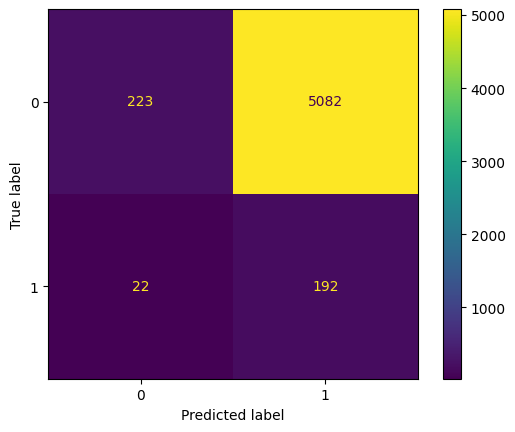

In [90]:
print(classification_report(y_test, y_classes, target_names=['0', '1']))
cm = confusion_matrix(y_test, y_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['0', '1'])
disp.plot()

plt.show()